#Mask Making
Positive resist.

This code will expose a mask, expose the defects: pin hole and spot chrom and how it's fix.

Our imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#Simulate development
simulates the process of using a mask to expose regions on a silicon wafer during a photolithography process.

In [ ]:
def Simulate_development(mask, resolution, exposure_dose):
    rows, cols = mask.shape
    #Creates a silicon wafer, where each cell of the mask is enlarged by the specified resolution
    mask_dev = np.zeros((rows * resolution, cols * resolution))

    for i in range(rows):
        for j in range(cols):
            if mask[i][j] == 1:
                # Simulate the development
                start_row = i * resolution
                start_col = j * resolution
                end_row = start_row + resolution
                end_col = start_col + resolution
                mask_dev[start_row:end_row, start_col:end_col] = exposure_dose #The part of silicon that expose to a E-beam

    return mask_dev

This method display the mask on silicon

In [ ]:
def display_mask(display_mask):
    plt.imshow(display_mask, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.title('Simulated mask')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.show()

In [ ]:
def expose_mask(mask):
    # Parameters
    resolution =  4 # Each mask pixel will be mapped to a 4x4 region on the silicon wafer
    exposure_dose = 0.8  # Simulated exposure dose for the exposed regions- not full light but most light

    # Simulate the dev and etch process
    mask_dev = Simulate_development(mask, resolution, exposure_dose)

    # Display the resulting mask_dev as an image on wafer
    display_mask(mask_dev)


#Creating a mask
Create mask and expose it on wafer.
0 - means it the resist (black)
1- means it light pass (white)

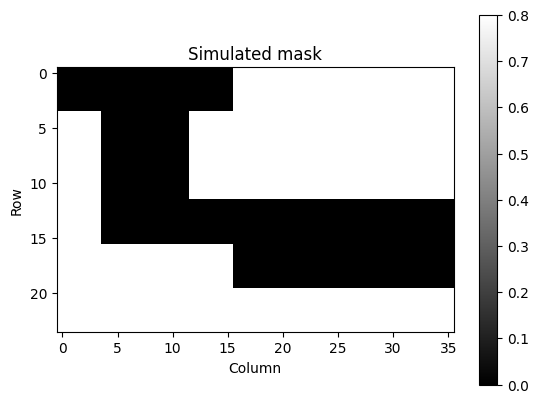

In [ ]:
# Example mask
mask_1 = np.array([
    [0, 0, 0, 0, 1, 1, 1, 1, 1],
    [1, 0, 0, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1]
])
# 0- means resist (black), 1- The light pass (white- 0.8 max)

expose_mask(mask_1)

#Pin hole defect
To create pin hole we need to create defect by add '1' that we put down chrom and has more area of "light pass"


In [ ]:
def pinhole (mask):
    pin_hole_mask = mask.copy()
    pin_hole_mask[0][2]=1
    pin_hole_mask[3][5]=1
    return pin_hole_mask

The pin hole mask

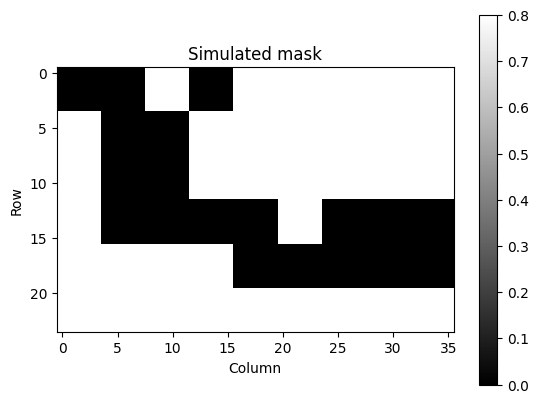

In [ ]:
mask_pin_hole= pinhole (mask_1)
expose_mask(mask_pin_hole)



# Fix Pin hole
To fix pin hole we need to add chrom so we add "0"

In [ ]:
def fix_pin_hole (mask):
    pin_hole_mask = mask.copy()
    pin_hole_mask[0][2]=0
    pin_hole_mask[3][5]=0
    return pin_hole_mask


The fix of defect "pin hole"

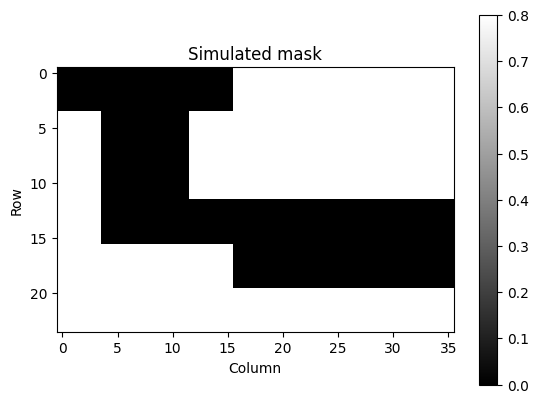

In [ ]:
mask_pin_hole_fix= fix_pin_hole (mask_pin_hole)
expose_mask(mask_pin_hole_fix)

#Chrom spot
To create a chrom post defect we need to add "0" that mean the resist that we want to put down stay.



In [ ]:
def chrom_spot (mask):
    chrom_spot_mask = mask.copy()
    chrom_spot_mask[1][6]=0
    chrom_spot_mask[5][0]=0
    return chrom_spot_mask



The chrom spot mask

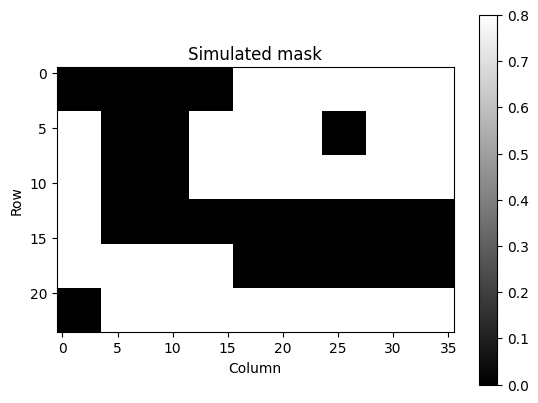

In [ ]:
chrom_spot_mask= chrom_spot (mask_1)
expose_mask(chrom_spot_mask)

To fix it we need to add "1" means to repair on the process and put down the resist

In [ ]:
def chrom_spot_fix (mask):
    chrom_spot_mask = mask.copy()
    chrom_spot_mask[1][6]=1
    chrom_spot_mask[5][0]=1
    return chrom_spot_mask

The mask without spot chrome

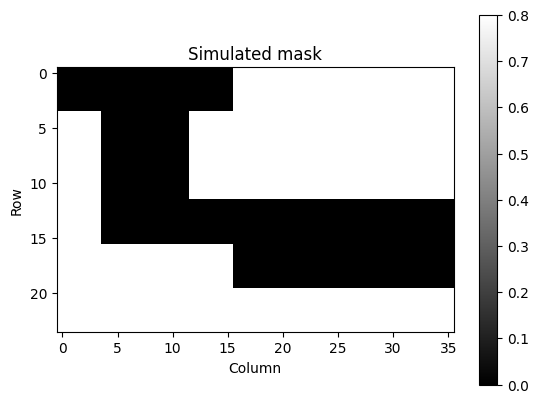

In [ ]:
chrom_spot_mask_fix= chrom_spot_fix (chrom_spot_mask)
expose_mask(chrom_spot_mask_fix)